In [22]:
# Access MatPlotLib graphs in jupyter notebook

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Merge data into one dataframe
rideshares_df = ride_df.merge(city_df,on="city")

rideshares_df['date'] = pd.to_datetime(rideshares_df['date'])

rideshares_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

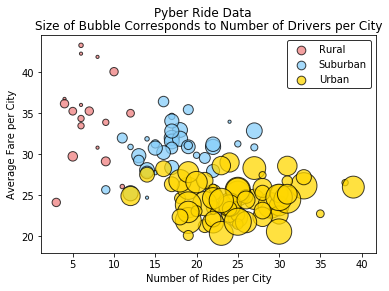

In [24]:
# Groupby city type
city = rideshares_df.groupby('city')

# Calculate the average fare
avg_fare = city.mean()['fare']
ride_count = city['ride_id'].count()

# Calculate the average drivers per city type
driver_count = city.mean()['driver_count']
city_type = city_df.set_index('city')['type']
city_data = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})

city_data.sort_values('Number of Drivers', ascending = False)


color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}

#create a variable to categorize based on type of city
rural = city_data[city_data['Type of City'] == 'Rural']
suburban = city_data[city_data['Type of City'] == 'Suburban']
urban = city_data[city_data['Type of City'] == 'Urban']

city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Data')

# scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')


# create a legend
legend = plt.legend(frameon = True, edgecolor = 'black')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Save Figure
plt.savefig("Fig1.png")

plt.show()

## Total Fares by City Type

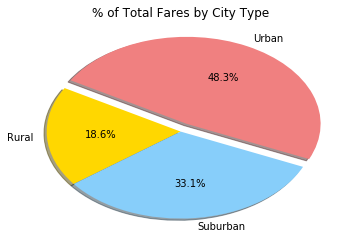

In [13]:
# Calculate Type Percents
type_percents = 100 * city_data.groupby(["Type of City"]).sum()["Average Fare"] / city_data["Average Fare"].sum()

# Build Pie Chart
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fig2.png")

# Show Figure
plt.show()

## Total Rides by City Type

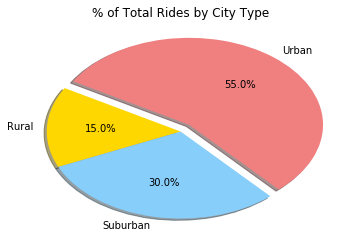

In [18]:
# Calculate Ride Percents
ride_percents = 100 * city_data.groupby(["Type of City"]).count()["Number of Rides"] / city_data["Number of Rides"].count()

# Build Pie Chart
plt.pie(ride_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Fig3.png")

# Show Figure
plt.show()

## Total Drivers by City Type

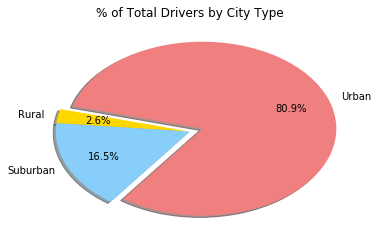

In [20]:
# Calculate Driver Percents
driver_percents = 100 * city_data.groupby(["Type of City"]).sum()["Number of Drivers"] / city_data["Number of Drivers"].sum()

# Build Pie Charts
plt.pie(driver_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', pctdistance=0.70,
        shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Fig4.png")

# Show Figure
plt.show()
